# Torbulene notebook


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import mplfinance as mpf


In [28]:
ticker_symbol = 'BTC-AUD'
#ticker_symbol = 'AAPL'

In [29]:
data = yf.download(ticker_symbol, start='2024-11-04', end='2025-01-21')

[*********************100%***********************]  1 of 1 completed


In [30]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-AUD,BTC-AUD,BTC-AUD,BTC-AUD,BTC-AUD
Date,,,,,
2024-11-04,104295.875000,105734.218750,102885.414062,105634.710938,52903137819
2024-11-05,102995.578125,105157.242188,101456.640625,104297.421875,62553604052
2024-11-06,104445.656250,106288.273438,102426.914062,102995.070312,69340076483
2024-11-07,115177.664062,116346.125000,104428.164062,104444.054688,180584236191
2024-11-08,113713.750000,115134.679688,112535.968750,115174.632812,95081465149


# Slice into 1-wk chunks


In [ ]:
data_dict = []

cc = 0
dd = []
for this_row in data.iterrows():

    if cc < 6:

        dd.append(this_row[1]['Open']['BTC-AUD'])
        dd.append(this_row[1]['High']['BTC-AUD'])
        dd.append(this_row[1]['Low']['BTC-AUD'])
        dd.append(this_row[1]['Close']['BTC-AUD'])
        
    cc += 1

    if cc == 6:

        cc = 0
        dd = np.array(dd)
        data_dict.append(
            {
                'Avg': np.mean(dd),
                'Max': np.max(dd),
                'Min': np.min(dd),
                'Spread': np.max(dd) - np.min(dd),
                'Data': dd
            }
        )

        dd = []

In [58]:
df = pd.DataFrame(data_dict)
df

,Avg,Max,Min,Data
0,108614.705078,117510.773438,101456.640625,"[105634.7109375, 105734.21875, 102885.4140625,..."
1,129049.163086,143964.406250,115157.742188,"[116330.9609375, 116919.109375, 115157.7421875..."
2,140357.840495,146168.468750,134738.828125,"[135250.9375, 142167.703125, 134738.828125, 14..."
3,148511.405599,153398.921875,140534.093750,"[144865.0, 152067.515625, 144452.03125, 151332..."
4,147969.941406,151476.250000,141770.500000,"[142062.171875, 149868.84375, 141770.5, 147706..."
5,152841.622396,161512.968750,142542.906250,"[148048.28125, 149079.53125, 144290.453125, 14..."
6,155987.742839,161528.281250,146538.125000,"[158196.578125, 158251.953125, 146538.125, 151..."
7,162121.612630,170670.593750,147937.109375,"[159568.015625, 165012.046875, 159337.421875, ..."
8,155113.717448,159980.625000,147913.671875,"[156359.859375, 159160.40625, 154233.0625, 155..."
9,151483.647135,156529.312500,146814.765625,"[153792.34375, 156529.3125, 150421.671875, 151..."


(array([2., 3., 2., 0., 8., 1., 1., 0., 5., 2.]),
 array([152537.03125  , 154435.3859375, 156333.740625 , 158232.0953125,
        160130.45     , 162028.8046875, 163927.159375 , 165825.5140625,
        167723.86875  , 169622.2234375, 171520.578125 ]),
 <BarContainer object of 10 artists>)

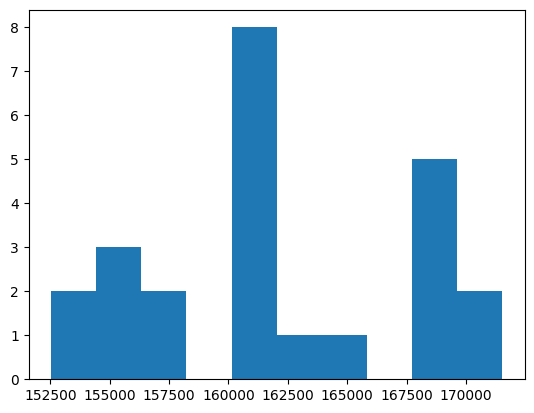

In [61]:
plt.hist(df['Data'][12])